## Installations

In [38]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install gradio

## Importations

In [39]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#Evaluation
from sklearn.metrics import mean_squared_error

#Persistance
import joblib

warnings.filterwarnings('ignore')

## EDA - Exploratory Data Analysis

### Load Dataset

In [40]:
df = pd.read_csv('sales_data.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


### Let's now inspect our data set

In [41]:
df.shape

(34867, 16)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [43]:
df.shape

(34867, 16)

In [44]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [45]:
df.describe(include='object')

,Date,Month,Customer Gender,Country,State,Product Category,Sub Category
count,34866,34866,34866,34866,34866,34866,34866
unique,576,12,2,4,45,3,17
top,3/1/2016,June,M,United States,California,Accessories,Tires and Tubes
freq,196,3680,17805,18076,10332,22534,11112


In [46]:
df.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [47]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34862    False
34863    False
34864    False
34865    False
34866    False
Length: 34867, dtype: bool

In [48]:
df.duplicated().sum()

0

### Let's Clean the data

In [49]:
#first let's drop the 
df = df.drop(columns=['index', 'Column1', 'Date', 'Cost'])

In [50]:
df = df.dropna(subset=['Revenue'])

In [51]:
df.dropna(inplace=True)

In [52]:
df.head()

,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
0,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,109.0
1,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,57.0
2,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,15.0
3,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,233.0
4,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,125.0


In [53]:
df.isna().sum()

Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Revenue             0
dtype: int64

In [54]:
df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Germany'],
      dtype=object)

In [55]:
df['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [56]:
df['Sub Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

In [57]:
df['State'].unique()

array(['Washington', 'California', 'Oregon', 'Essonne', 'Yveline',
       'England', 'Hessen', 'Hamburg', 'Seine Saint Denis', 'Saarland',
       'Nordrhein-Westfalen', 'Bayern', 'Seine (Paris)', 'Pas de Calais',
       'Moselle', 'Hauts de Seine', 'Nord', 'Seine et Marne', 'Loiret',
       'Charente-Maritime', 'Loir et Cher', 'Brandenburg', 'Alabama',
       "Val d'Oise", 'Val de Marne', 'Minnesota', 'Wyoming', 'Ohio',
       'Garonne (Haute)', 'Kentucky', 'Texas', 'Missouri', 'Somme',
       'New York', 'Florida', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Mississippi', 'Montana',
       'Arizona', 'Massachusetts', 'Utah'], dtype=object)

### Univariate Analysis: Visualize the distribution of 'Revenue'

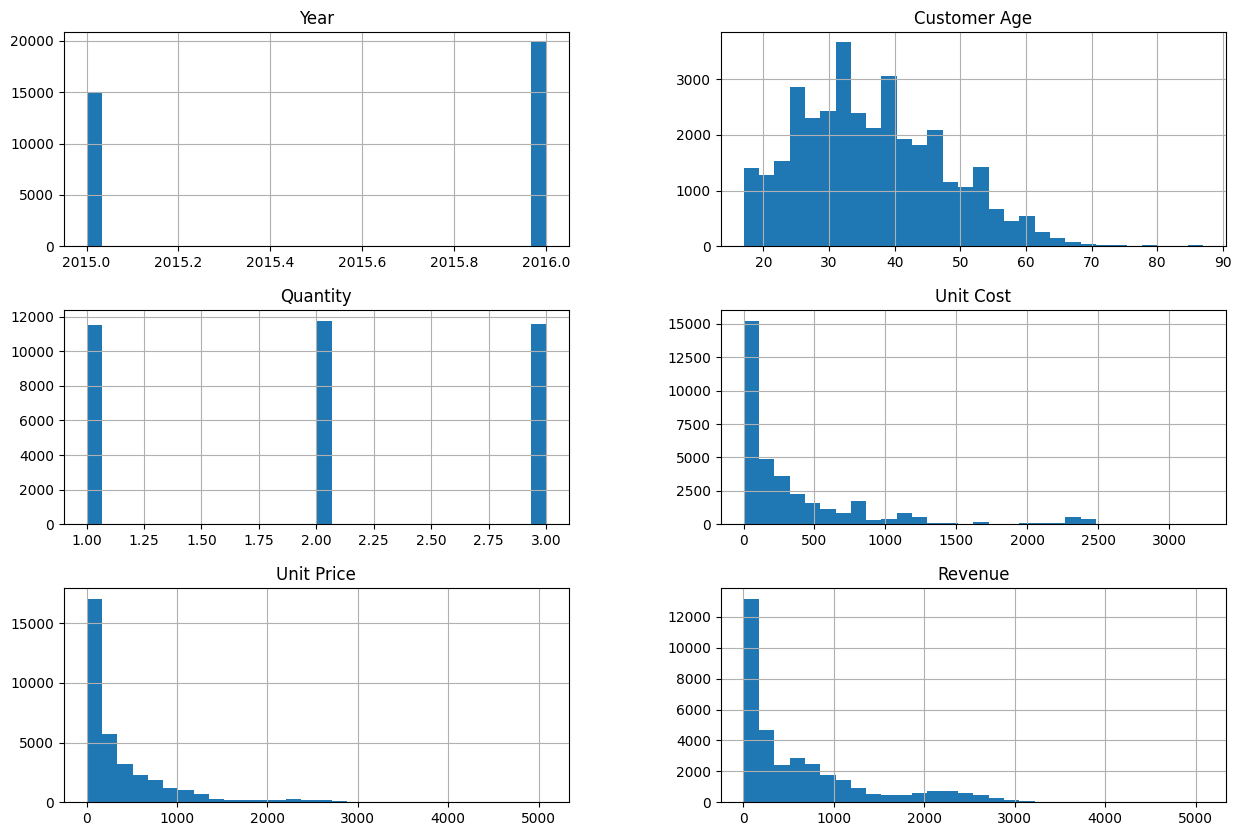

In [58]:
df.hist(figsize=(15, 10), bins=30)
plt.show()

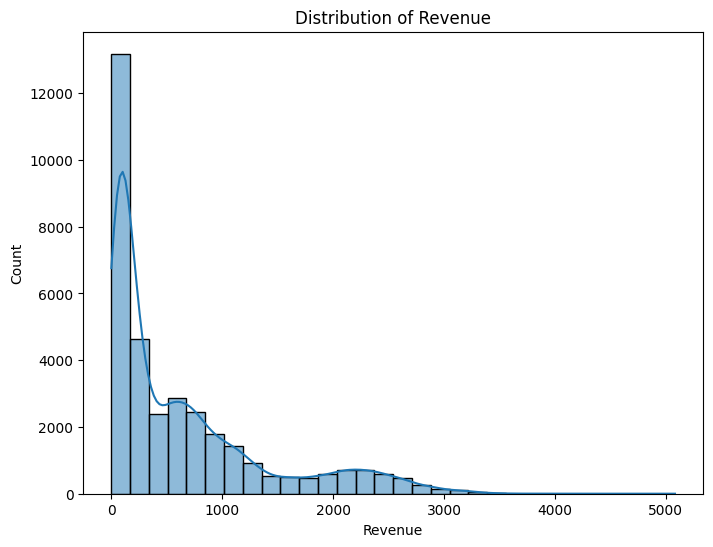

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Revenue'], bins=30, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.show()

### Bivariate Analysis: Check the correlation between numerical features and 'Revenue'


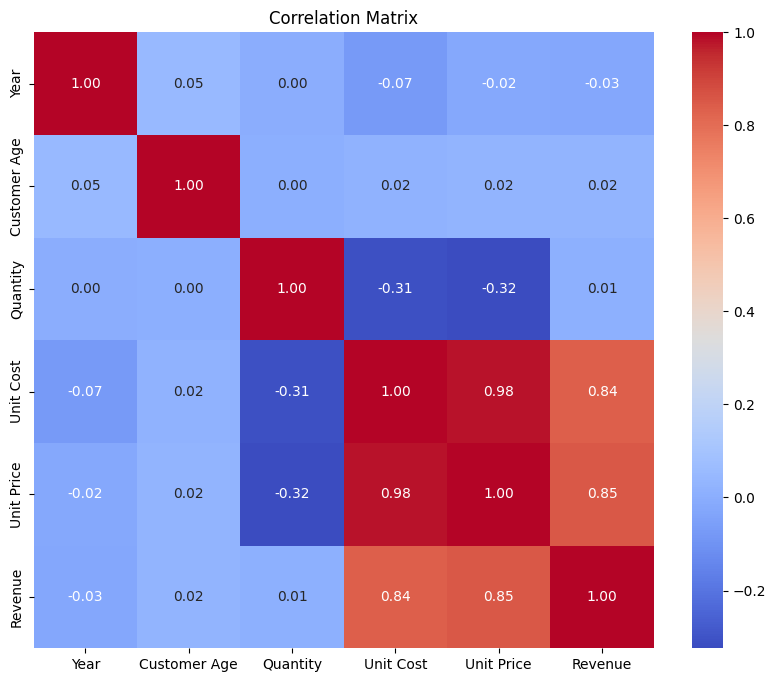

In [60]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Multivariate Analysis: The relationship between 'Revenue' and Gender


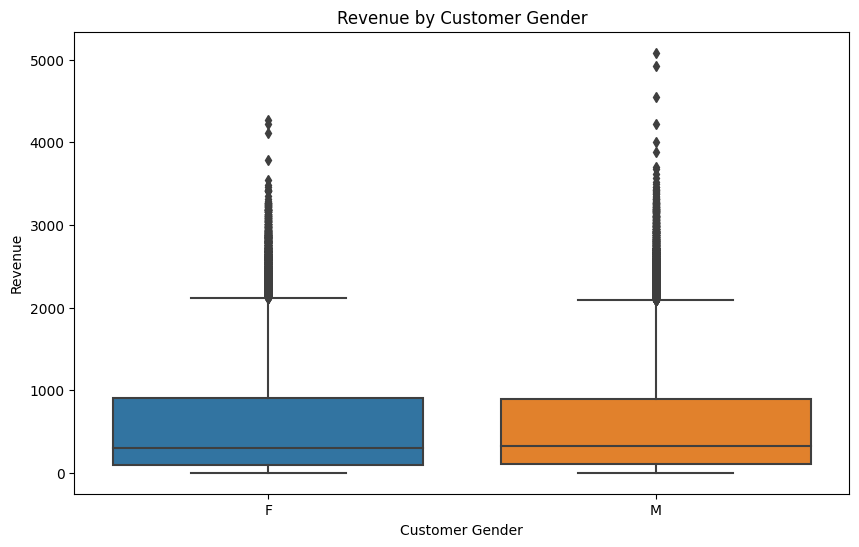

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Gender', y='Revenue', data=df)
plt.title('Revenue by Customer Gender')
plt.show()

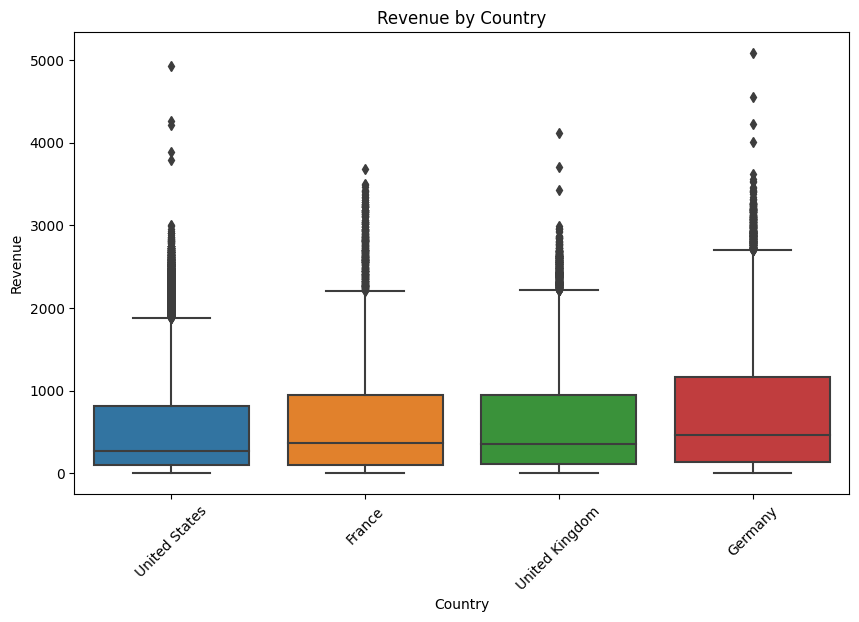

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Revenue', data=df)
plt.title('Revenue by Country')
plt.xticks(rotation=45)
plt.show()

### Split the data into features (X) and target (y)

In [63]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

In [64]:
X.head()

,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
0,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000
1,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000
2,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000
3,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000
4,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667


In [65]:
y.head()

0    109.0
1     57.0
2     15.0
3    233.0
4    125.0
Name: Revenue, dtype: float64

In [66]:
# Lets split the data set into training and testing/evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create Preprocessing pipelines

In [67]:
# Preprocessing pipeline for numerical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features with 'handle_unknown' set to 'ignore'
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Column transformer to apply different preprocessing pipelines to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, ['Customer Age', 'Quantity', 'Unit Cost', 'Unit Price']),
    ('cat', categorical_pipeline, ['Month', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category'])
])


### Train and evaluate multiple models using pipelines

####  RandomForest

In [68]:
# Initialize the model with the preprocessor
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Train the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer Age', 'Quantity',
                                                   'Unit Cost', 'Unit Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Month', 'Customer Gender',
                                                   'Country', 'State',
                                                   'Product Category',
                                                   'Sub Category'])])),
                ('model', RandomForestRegressor())])

In [69]:
# Evaluate  the model
rf_preds = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)

print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 31.0689484711866


#### Linear Regression

In [70]:
# Initialize the model with the preprocessor
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
lr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer Age', 'Quantity',
                                                   'Unit Cost', 'Unit Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Month', 'Customer Gender',
                                                   'Country', 'State',
                                                   'Product Category',
                                                   'Sub Category'])])),
                ('model', LinearRegression())])

In [71]:
# Evaluate the model
lr_preds = lr_model.predict(X_test)

lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)

print(f"Linear Regression RMSE: {lr_rmse}")

Linear Regression RMSE: 274.42848726701806


#### SVG

In [72]:
# Initialize the model with the preprocessor
svr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR())
])


svr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer Age', 'Quantity',
                                                   'Unit Cost', 'Unit Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Month', 'Customer Gender',
                                                   'Country', 'State',
                                                   'Product Category',
                                                   'Sub Category'])])),
                ('model', SVR())])

In [73]:
# Evaluate the model
svr_preds = svr_model.predict(X_test)

svr_rmse = mean_squared_error(y_test, svr_preds, squared=False)

print(f"Support Vector Regression RMSE: {svr_rmse}")

Support Vector Regression RMSE: 376.42695709808083


In [74]:
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Support Vector Regression RMSE: {svr_rmse}")

Random Forest RMSE: 31.0689484711866
Linear Regression RMSE: 274.42848726701806
Support Vector Regression RMSE: 376.42695709808083


### Model Persistance

In [75]:
# Save the Random Forest model

best_model = rf_model
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')


['preprocessor.joblib']